# Information extraction

## 1. POS tagging

Tagging words with their part of speech

Lexical categories, based on a specific target

In [1]:
import nltk

In [2]:
sent = '''
"Mexico has been trying to stage a recovery since the beginning of this year and it's always been getting ahead of itself in terms of fundamentals,"
said Matthew Hickman of Lehman Brothers in New York.
'''

In [3]:
tok_sent = nltk.word_tokenize(sent)

In [4]:
tok_sent

["''",
 'Mexico',
 'has',
 'been',
 'trying',
 'to',
 'stage',
 'a',
 'recovery',
 'since',
 'the',
 'beginning',
 'of',
 'this',
 'year',
 'and',
 'it',
 "'s",
 'always',
 'been',
 'getting',
 'ahead',
 'of',
 'itself',
 'in',
 'terms',
 'of',
 'fundamentals',
 ',',
 "''",
 'said',
 'Matthew',
 'Hickman',
 'of',
 'Lehman',
 'Brothers',
 'in',
 'New',
 'York',
 '.']

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yi quan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
nltk.pos_tag(tok_sent)

[("''", "''"),
 ('Mexico', 'NNP'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('stage', 'VB'),
 ('a', 'DT'),
 ('recovery', 'NN'),
 ('since', 'IN'),
 ('the', 'DT'),
 ('beginning', 'NN'),
 ('of', 'IN'),
 ('this', 'DT'),
 ('year', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('always', 'RB'),
 ('been', 'VBN'),
 ('getting', 'VBG'),
 ('ahead', 'RB'),
 ('of', 'IN'),
 ('itself', 'PRP'),
 ('in', 'IN'),
 ('terms', 'NNS'),
 ('of', 'IN'),
 ('fundamentals', 'NNS'),
 (',', ','),
 ("''", "''"),
 ('said', 'VBD'),
 ('Matthew', 'NNP'),
 ('Hickman', 'NNP'),
 ('of', 'IN'),
 ('Lehman', 'NNP'),
 ('Brothers', 'NNPS'),
 ('in', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('.', '.')]

In [7]:
tok_sent = nltk.word_tokenize('They refuse to permit us to obtain the refuse permit')

In [8]:
nltk.pos_tag(tok_sent)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [9]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to C:\Users\yi
[nltk_data]     quan\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [10]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## 2. Information extraction

Identifying structure in unstructued data

In [11]:
rels = [('Matthew Hickman', 'WORKS_FOR', 'Lehman Brothers'),
       ('Lehman Brothers','IN','New York')]

In [12]:
# who is based in NY?
[e1 for (e1,rel,e2) in rels if (rel=='IN' and e2=='New York')]

['Lehman Brothers']

In [13]:
# who works for Lehman
[e1 for (e1,rel,e2) in rels if (rel=='WORKS_FOR' and e2=='Lehman Brothers')]

['Matthew Hickman']

In [14]:
sent = '''
"Mexico has been trying to stage a recovery since the beginning of this year and it's always been getting ahead of itself in terms of fundamentals,"
said Matthew Hickman of Lehman Brothers in New York.
'''

In [15]:
sent

'\n"Mexico has been trying to stage a recovery since the beginning of this year and it\'s always been getting ahead of itself in terms of fundamentals,"\nsaid Matthew Hickman of Lehman Brothers in New York.\n'

In [16]:
def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [17]:
pp_sent = ie_preprocess(sent)

In [18]:
print(pp_sent)

[[("''", "''"), ('Mexico', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('trying', 'VBG'), ('to', 'TO'), ('stage', 'VB'), ('a', 'DT'), ('recovery', 'NN'), ('since', 'IN'), ('the', 'DT'), ('beginning', 'NN'), ('of', 'IN'), ('this', 'DT'), ('year', 'NN'), ('and', 'CC'), ('it', 'PRP'), ("'s", 'VBZ'), ('always', 'RB'), ('been', 'VBN'), ('getting', 'VBG'), ('ahead', 'RB'), ('of', 'IN'), ('itself', 'PRP'), ('in', 'IN'), ('terms', 'NNS'), ('of', 'IN'), ('fundamentals', 'NNS'), (',', ','), ("''", "''"), ('said', 'VBD'), ('Matthew', 'NNP'), ('Hickman', 'NNP'), ('of', 'IN'), ('Lehman', 'NNP'), ('Brothers', 'NNPS'), ('in', 'IN'), ('New', 'NNP'), ('York', 'NNP'), ('.', '.')]]


## 3. Named entity recognition

### Common named entity types

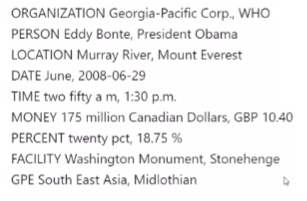

In [19]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\yi
[nltk_data]     quan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [20]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\yi
[nltk_data]     quan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [21]:
nerResults = [nltk.ne_chunk(pts) for pts in pp_sent]

In [22]:
nerResults

[Tree('S', [("''", "''"), Tree('GPE', [('Mexico', 'NNP')]), ('has', 'VBZ'), ('been', 'VBN'), ('trying', 'VBG'), ('to', 'TO'), ('stage', 'VB'), ('a', 'DT'), ('recovery', 'NN'), ('since', 'IN'), ('the', 'DT'), ('beginning', 'NN'), ('of', 'IN'), ('this', 'DT'), ('year', 'NN'), ('and', 'CC'), ('it', 'PRP'), ("'s", 'VBZ'), ('always', 'RB'), ('been', 'VBN'), ('getting', 'VBG'), ('ahead', 'RB'), ('of', 'IN'), ('itself', 'PRP'), ('in', 'IN'), ('terms', 'NNS'), ('of', 'IN'), ('fundamentals', 'NNS'), (',', ','), ("''", "''"), ('said', 'VBD'), Tree('PERSON', [('Matthew', 'NNP'), ('Hickman', 'NNP')]), ('of', 'IN'), Tree('ORGANIZATION', [('Lehman', 'NNP'), ('Brothers', 'NNPS')]), ('in', 'IN'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')]), ('.', '.')])]

In [23]:
nerResults[0].pprint()

(S
  ''/''
  (GPE Mexico/NNP)
  has/VBZ
  been/VBN
  trying/VBG
  to/TO
  stage/VB
  a/DT
  recovery/NN
  since/IN
  the/DT
  beginning/NN
  of/IN
  this/DT
  year/NN
  and/CC
  it/PRP
  's/VBZ
  always/RB
  been/VBN
  getting/VBG
  ahead/RB
  of/IN
  itself/PRP
  in/IN
  terms/NNS
  of/IN
  fundamentals/NNS
  ,/,
  ''/''
  said/VBD
  (PERSON Matthew/NNP Hickman/NNP)
  of/IN
  (ORGANIZATION Lehman/NNP Brothers/NNPS)
  in/IN
  (GPE New/NNP York/NNP)
  ./.)


In [ ]:
nerResults[0].draw()

## 4.Relation extraction

In [26]:
# who works for Lehman?
# IN = re.compile(r'."\bin\b(?!\b.+ing)"')
import re
OF = re.compile(r'.*\bof\b')

for rel in nltk.sem.extract_rels('PER', 'ORG', nerResults[0], corpus='ace', pattern=OF):
    print(nltk.sem.rtuple(rel))

[PER: 'Matthew/NNP Hickman/NNP'] 'of/IN' [ORG: 'Lehman/NNP Brothers/NNPS']


In [27]:
nltk.download('ieer')

[nltk_data] Downloading package ieer to C:\Users\yi
[nltk_data]     quan\AppData\Roaming\nltk_data...
[nltk_data]   Package ieer is already up-to-date!


True

In [28]:
IN = re.compile(r'.*\bin\b(?!\b.+ing)')

for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG','LOC', doc, corpus='ieer', pattern=IN):
        print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']
